# Clean and Tranform Data --Part One

The goal of this projected was to ***explore the possibility of predicting total nitrogen and phosphorus in lakes (which are expensive and time consuming to monitor) using easily measurables features***. This project was completed 2018 and results were published in the Journal of Environmental Engineering, American Society of Civil Engineer, in 2019. The article is available [here](https://ascelibrary.org/doi/abs/10.1061/%28ASCE%29EE.1943-7870.0001528). This notebook presents the methods applied to train and optimize the predictive model. An excel based user interface was created and included in the project file. 

Data for this project was collected from the National Aquatic Resource Surveys (NARS), the U.S. Environmental Protection Agency. The water quality condition of U.S. waters is surveyed in every five years under the NARS program. The water quality condition is assessed through several indicators. For this specific project, the national lake survey (2007 and 2012) is used. These data files are:  
+ Site information [2007](https://www.epa.gov/sites/production/files/2014-01/nla2007_sampledlakeinformation_20091113.csv) and [2012](https://www.epa.gov/sites/production/files/2016-12/nla2012_wide_siteinfo_08232016.csv)
+ Site information disctionary [2007](https://www.epa.gov/sites/production/files/2014-01/nla2007_sampledlakeinformation_info_20091113.txt) and [2012](https://www.epa.gov/sites/production/files/2016-12/nla2012_wide_siteinfo_meta_08232016.txt)
+ water chemistry condition 2007 [Data & Dictionary](https://www.epa.gov/national-aquatic-resource-surveys/data-national-aquatic-resource-surveys)
+ Water chemistry condition 2012 [data](https://www.epa.gov/sites/production/files/2016-12/nla2012_waterchem_wide.csv) and  [disctionary](https://www.epa.gov/sites/production/files/2016-12/nla2012_waterchem_meta.txt)
+ Water isotope variables [2007](https://www.epa.gov/sites/production/files/2018-08/nla2007_isotopes_wide.csv) and [2012](https://www.epa.gov/sites/production/files/2018-08/nla2012_isotopes_wide.csv)
+ Water isotope iariables disctionaries [2007](https://www.epa.gov/sites/production/files/2018-08/isotopes_wide_met_0.txt) and [2012](https://www.epa.gov/sites/production/files/2018-08/isotopes_wide_met.txt)
+ Dissolved oxygen 2007 [data](https://www.epa.gov/sites/production/files/2014-10/nla2007_meando_info_20091007.txt) and [dictionary](https://www.epa.gov/sites/production/files/2014-10/nla2007_meando_data_20091007.csv)
+ Trophic condition 2007 [data](https://www.epa.gov/sites/production/files/2014-10/nla2007_trophic_conditionestimate_20091123.csv) and [dictionary](https://www.epa.gov/sites/production/files/2014-10/nla2007_trophic_conditionestimate_info_20091123.txt)
+ Secchi 2012 [data](https://www.epa.gov/sites/production/files/2016-12/nla2012_secchi_08232016.csv) and [dictionary](https://www.epa.gov/sites/production/files/2016-12/nla2012_secchi_meta_08232016.txt)
+ Chlorophyll a 2012 [data](https://www.epa.gov/sites/production/files/2016-11/nla2012_chla_wide.csv) and [dictionary](https://www.epa.gov/sites/production/files/2016-11/nla2012_chla_wide_meta.txt)

## Explore Survey Sites

 This analysis was performed to check if survey sites in 2007 and 2012 were the same.

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

#Inspect 2007 survey sites
pd.options.display.max_columns = 100 
pd.options.display.max_colwidth = 14
site2007 = pd.read_csv('https://www.epa.gov/sites/production/files/2014-01/nla2007_sampledlakeinformation_20091113.csv')
print(site2007.shape)
site2007.head()

(1252, 99)


,SITE_ID,VISIT_NO,SAMPLED,DATE_COL,REPEAT,SITE_TYPE,LAKE_SAMP,TNT,LON_DD,LAT_DD,ALBERS_X,ALBERS_Y,FLD_LON_DD,FLD_LAT_DD,FLD_SRC,FLD_FLAG,ST,STATE_NAME,CNTYNAME,EPA_REG,NHDNAME,LAKENAME,AREA_CAT7,NESLAKE,NESLAKE_ID,STRATUM,PANEL,DSGN_CAT,MDCATY,WGT,WGT_NLA,ADJWGT_CAT,URBAN,WSA_ECO3,WSA_ECO9,ECO_LEV_3,ECO_L3_NAM,NUT_REG,NUTREG_NAME,ECO_NUTA,LAKE_ORIGIN,ECO3_X_ORIGIN,REF_CLUSTER,REFCLUS_NAME,RT_NLA,REF_NUTR,AREA_HA,SIZE_CLASS,LAKEAREA,LAKEPERIM,SLD,DEPTH_X,DEPTHMAX,ELEV_PT,HUC_2,HUC_8,REACHCODE,COM_ID,INDEX_SAMP,STATUS_VER,STATUS_FLD,STATUS_DSK,PERM_WATER,NON_SALINE,SRFC_AREA,METER_DEEP,OPEN_WATER,AQUACULTUR,DISPOSAL,SEWAGE,EVAPORATE,PHYS_ACCES,FLAG_INFO,COMMENT_INFO,SAMPLED_PROFILE,SAMPLED_SECCHI,SAMPLED_ASSESS,SAMPLED_PHAB,INDXSAMP_PHAB,SAMPLED_CHEM,INDXSAMP_CHEM,SAMPLED_CHLA,INDXSAMP_CHLA,SAMPLED_ZOOP,INDXSAMP_ZOOP,SAMPLED_PHYT,INDXSAMP_PHYT,SAMPLED_CORE,INDXSAMP_CORE,SAMPLED_INF,INDXSAMP_INF,SAMPLED_ENTE,INDXSAMP_ENTE,SAMPLED_MICR,INDXSAMP_MICR,SAMPLED_SDHG,INDXSAMP_SDHG,VISIT_ID,FID_1
0,NLA06608-0001,1,YES,7/31/2007,NaN,PROB_Lake,Target_Sam...,Target,-114.021840,48.979029,-1.327628e+06,1.405395e+06,-114.018400,48.983480,Index_site,NaN,MT,Montana,GLACIER,Region_8,"Wurdeman, ...",Lake Wurdeman,"(50,100]",NaN,NaN,NLALake,Panel_1,WMT_MT_(50...,0.028208,35.109443,7.594532,MT,NO,WMTNS,WMT,41,Canadian R...,II,Western Fo...,II,NATURAL,WMTNS NATURAL,F,Western Mo...,REF,Y,66.293056,03:>50-100 ha,0.662931,3.178510,1.101247,8.3,8.3,1605.73,10,10010001,1.001000e+13,9301511,Secchi_Samp,Target_Sam...,NaN,Sampleable,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,NaN,NaN,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,NO,YES,NO CORE SA...,YES,YES,YES,YES,YES,NO,YES,7468.0,0
1,NLA06608-0002,1,YES,6/14/2007,YES,PROB_Lake,Target_Sam...,Target,-79.983791,33.036064,1.479704e+06,-3.744821e+05,-79.983660,33.035710,Index_site,NaN,SC,South Caro...,BERKELEY,Region_4,Crane Pond,Crane Pond,"(10,20]",NaN,NaN,NLALake,Panel_1,CPL_SC_(10...,0.008172,121.190925,60.654227,SC,YES,PLNLOW,CPL,63,Middle Atl...,XIV,Eastern Co...,CPL,MAN-MADE,PLNLOW MAN...,D,Plains and...,SO-SO,N,14.437998,02:>10-50 ha,0.144380,1.743510,1.294393,2.3,2.3,4.90,3,3050201,3.050201e+12,9642039,Secchi_Samp,Target_Sam...,NaN,Sampleable,Yes,Yes,Yes,Yes,Missing,No,No,No,No,Yes,NaN,NaN,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES (Top o...,YES,NOT DONE,YES,YES,YES,YES,YES,YES,YES,7469.0,2
2,NLA06608-0002,2,YES,7/23/2007,YES,PROB_Lake,Target_Sam...,Target,-79.983791,33.036064,1.479704e+06,-3.744821e+05,-79.981575,33.035681,Index_site,NaN,SC,South Caro...,BERKELEY,Region_4,Crane Pond,Crane Pond,"(10,20]",NaN,NaN,NLALake,Panel_1,CPL_SC_(10...,0.008172,121.190925,60.654227,SC,YES,PLNLOW,CPL,63,Middle Atl...,XIV,Eastern Co...,CPL,MAN-MADE,PLNLOW MAN...,D,Plains and...,SO-SO,N,14.437998,02:>10-50 ha,0.144380,1.743510,1.294393,1.3,1.3,4.90,3,3050201,3.050201e+12,9642039,Secchi_Samp,Target_Sam...,NaN,Sampleable,Yes,Yes,Yes,Yes,Missing,No,No,No,No,Yes,NaN,NaN,YES,YES,YES,YES,NO,YES,NO,YES,NO,YES,NO,YES,NO,YES (Top o...,NO,NOT DONE,NO,YES,NO,YES,NO,YES,NO,7470.0,1
3,NLA06608-0003,1,YES,8/29/2007,YES,PROB_Lake,Target_Sam...,Target,-97.859866,28.047742,-1.834773e+05,-1.051757e+06,-97.860278,28.047500,Index_site,NaN,TX,Texas,SAN PATRICIO,Region_6,NaN,Wilderness...,"(4,10]",NaN,NaN,NLALake,Panel_1,"(4,10]",0.001313,754.345388,210.504940,TX,YES,PLNLOW,CPL,34,Western Gu...,X,Texas-Loui...,CPL,NATURAL,PLNLOW NAT...,D,Plains and...,TRASH,N,5.701737,01: <10 ha,0.057017,1.265008,1.494462,2.5,2.5,17.60,12,12110111,1.211011e+13,3169452,Secchi_Samp,Target_Sam...,Sampleable,Do_Field,Yes,Yes,Yes,Yes,Yes,No,No,No,No,Yes,NaN,NaN,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES,YES (Top o...,YES,NOT DONE,YES,YES,YES,YES,YES,YES,YES,7471.0,4
4,NLA06608-0003,2,YES,9/6/2007,YES,PROB_Lake,Target_Sam...,Target,-97.859866,28.047742,-1.834773e+05,-1.051757e+06,-97.859167,28.047500,Index_site,NaN,TX,Texas,SAN PATRICIO,Region_6,NaN,Wilderness...,"(4,10]",NaN,NaN,NLALake,Panel_1,"(4,10]",0.001313,754.345388,210.504940,TX,

In [60]:
#Inspect 2012 survey sites
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 14
site2012 = pd.read_csv('https://www.epa.gov/sites/production/files/2016-12/nla2012_wide_siteinfo_08232016.csv')
print(site2012.shape)
site2012.head()

(2764, 111)


,SITE_ID,VISIT_NO,UID,DATE_COL,AGGR_ECO3_2015,AGGR_ECO9_2015,AREA_HA,AREACLS,BORD_LAKE,CAT_UNIQUE,CH0712_CAT,CH0712_USE,CH0712_WGT,CNTYNAME,COMID2007,COMID2012,COMIDS2007,DES_FTYPE,DSGN12,ELEVATION,EPA_REG,EVAL_NAME,EVALSTAT,FEOW_ID,FS_EW,FW_ECO3,FW_ECO9,GNIS_ID,GNIS_NAME,HUC2,HUC8,LAKE_ORIGIN,LAKE_ORIGIN12,LAT_DD83,LON_DD83,MAJ_BASIN,MDCATY,MISS_BASIN,NA_L1CODE,NA_L2CODE,NA_L3CODE,NARS_NAME,NES_LAKE,NESLAKE_ID,NESSTORET,OWN_TYPE,OWNSHP,PANEL,PERIM_KM,RCHCODE,...,ST_WGT_CAT,ST_WGT_DSGN,STATE,STATE_NLA,STATE_PCNT,STATECTY,STATUS,STATUS_ST,STRATUM,TNT,TNT_ST,URBAN,US_L3CODE,US_L3CODE_2015,US_L4CODE,US_L4CODE_2015,WGT_ALL,WGT_CAT,WGT_DSGN,XCOORD,YCOORD,ECO_BIO,IM_COMMENT,INDEX_NLA,INDXSAMP_BENT,INDXSAMP_CHEM,INDXSAMP_CHLA,INDXSAMP_CORE,INDXSAMP_ENTE,INDXSAMP_MICR,INDXSAMP_PHAB,INDXSAMP_SDHG,INDXSAMP_ZOOP,REF_NLA12_NUTR,RT_NLA12_BENT,RT_NLA12_ZOOP,SAMPLED_BENT,SAMPLED_CORE,SAMPLED_ENTE,SAMPLED_MICR,SAMPLED_PHAB,SAMPLED_PHYT,SAMPLED_PROFILE,SAMPLED_SDHG,SAMPLED_ZOCN,SAMPLED_ZOCR,SAMPLED_ZOFN,SAMPLED_ZOFR,SAMPLED_ZOOP,PUBLICATION_DATE
0,NLA12_AL-101,1.0,6300.0,5/24/2012,EHIGH,SAP,1301.871970,F:500+,No,NLA07RVT,NLA07_RVT12,Include,20.288885,TUSCALOOSA,21656744.0,166759236,21656744,Lake/Pond:...,Included,57.03,Region_4,Holt Lock ...,TargetSamp...,153,NaN,EHIGH,SAP,NaN,NaN,3,3160112,MAN_MADE,RESERVOIR,33.292041,-87.391382,3,NonREF07,No,8,8.4,8.4.9,Holt Lock ...,NESLake,105,105,Non Federal,Non-Federal,NLA07RVT2,104.208666,3.16011E+12,...,NaN,0.0,AL,AL,100,1073,Target_Sam...,NaN,AL_NLA07RVT,Target,NaN,Yes,68,68,68f,68f,20.288885,AL_>4,3.666670,795432.2051,-434840.7897,EHIGH,No phab do...,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,T,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,NaN,8/23/2016
1,NLA12_AL-101,2.0,7374.0,7/21/2012,EHIGH,SAP,1301.871970,F:500+,No,NLA07RVT,NLA07_RVT12,Include,20.288885,TUSCALOOSA,21656744.0,166759236,21656744,Lake/Pond:...,Included,57.03,Region_4,Holt Lock ...,TargetSamp...,153,NaN,EHIGH,SAP,NaN,NaN,3,3160112,MAN_MADE,RESERVOIR,33.292041,-87.391382,3,NonREF07,No,8,8.4,8.4.9,Holt Lock ...,NESLake,105,105,Non Federal,Non-Federal,NLA07RVT2,104.208666,3.16011E+12,...,NaN,0.0,AL,AL,100,1073,Target_Sam...,NaN,AL_NLA07RVT,Target,NaN,Yes,68,68,68f,68f,20.288885,AL_>4,3.666670,795432.2051,-434840.7897,EHIGH,Assigned a...,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,T,T,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,NaN,8/23/2016
2,NLA12_AL-102,1.0,7228.0,7/17/2012,EHIGH,SAP,72.950420,D:50-100,No,NLA07RVT,NLA07_RVT12,Include,46.617902,CULLMAN,18587568.0,18587568,18587568,Lake/Pond:...,Included,247.04,Region_4,George Lake,TargetSamp...,153,NaN,EHIGH,SAP,131985.0,George Lake,3,3160109,MAN_MADE,RESERVOIR,34.227816,-86.843449,3,NonREF07,No,8,8.4,8.4.9,George Lake,NaN,NaN,NaN,Non Federal,Non-Federal,NLA07RVT,11.872305,3.16011E+12,...,NaN,0.0,AL,AL,100,1043,Target_Sam...,NaN,AL_NLA07RVT,Target,NaN,Yes,68,68,68d,68d,46.617902,AL_>4,3.666667,835851.3010,-326047.1005,EHIGH,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,S,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,NaN,8/23/2016
3,NLA12_AL-103,1.0,7292.0,7/19/2012,EHIGH,SAP,10363.258480,F:500+,No,NLA07RVT,NLA07_RVT12,Include,51.331899,TALLADEGA,22273142.0,166759059,22273142,Lake/Pond:...,Included,141.76,Region_4,Logan Mart...,TargetSamp...,153,NaN,EHIGH,SAP,NaN,NaN,3,3150106,MAN_MADE,RESERVOIR,33.762478,-86.053158,3,NonREF07,No,8,8.4,8.4.1,NaN,NaN,NaN,NaN,Non Federal,Non-Federal,NLA07RVT,688.459134,3.15011E+12,...,NaN,0.0,AL,AL,100,1055,Target_Sam...,NaN,AL_NLA07RVT,Target,NaN,Yes,67,67,67g,67g,51.331899,AL_>4,3.666667,913172.7602,-370517.4939,EHIGH,NaN,Y,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S,S,N,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Y,NaN,Y,NaN,NaN,8/23/2016
4,NLA12_AL-104,1.0,7368.0,7/23/2012,PLNLOW,CPL,4731.474336,F:500+,No,NLA07RVT,NLA07_RVT12,Include,101.491046,SUMTER,21677972.0,21677972,21677972,Lake/Pond:...,Included,22.28,Region_4,Demopolis ...,TargetSamp...,153,NaN,PLNLOW,CPL,NaN,NaN,3,3160201,MAN_MADE,RESERVOIR,32.515869,-87.861085,3,NonREF07,No,8,8.3,8.3.5,NaN,NaN,NaN,NaN,Non Federal,Non

Initial observations
+ The site id for 2007 and 2017 survey sites are in a different format. The 2007 site id is labeled as NL + number, whereas the 2017 site id includes state information along with NLA + number
+ Visit number column indicates that a single site is surveyed multiple time
+ Each row contains longitude and latitude information that can be analyzed to check site info
+ Features like SAMPLED contains one unique values

### Number of Survey Sites
The unique site id is counted to identify the number of survey sites. 

In [61]:
# The number of survey sites in 2007 and 2012

print('The number of survey site in 2007: ' + str(site2007['SITE_ID'].nunique()))
print('The number of survey site in 2012: ' + str(site2012['SITE_ID'].nunique()))

The number of survey site in 2007: 1157
The number of survey site in 2012: 2664


### Check Site Similarities
The geographical location of surveyed sites ( latitude and longitude) in 2007 and 2012 are based on NAD83 datum. An inner merge on latitude and longitude columns of 2007 and 2012 site files is used to identify matching sites.

In [62]:
# Merge the 2007 and 2012 site file on latitude 
merged_on_lat = pd.merge(left = site2007, right = site2012, left_on = 'LAT_DD', right_on = 'LAT_DD83', how='inner')
merged_on_lat.shape[0] # display number of matching rows

0

In [63]:
# Inner merge the 2007 and 2012 site information on latitude 
merged_on_lat = pd.merge(left = site2007, right = site2012, left_on = 'LON_DD', right_on = 'LON_DD83', how='inner')
merged_on_lat.shape[0]

0

It turns out that survey sites don't match on latitude/longitude. From this, we can conclude that the 2007 and 2017 survey sites are different. 

# Clean and Transform 2007 Data Files

The following steps are applied to clean and transform the 2007 data files.
+ The data dictionary of each file were studied to understand what each feature represent
+ Remove features that:
    + leak information from the future
    + contain redundant information
    + don't affect target variables, such as randomly generated fields
+ Clean data
    + Handle missing values and duplicates

In [65]:
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 15
water_chem2007 = pd.read_csv('NRSA0809_Data_WaterChemistry_131108-4.csv')
water_chem2007.style.highlight_null()
print(water_chem2007.shape)
water_chem2007.head(3)

(1326, 158)


,SITE_ID,YEAR,VISIT_NO,SITE_TYPE,LAKE_SAMP,SAMPLED,DATE_COL,SAMPLE_CATEGORY,DATECHEM,SAMPLED_CHEM,INDXSAMP_CHEM,PH_FIELD,PH_FIELD_DEPTH,SAMPLE_DEPTH,SAMPLE_ID_CHEM,LAB_ID_CHEM,PH_LAB,PHLAB_FLAG,COND,COND_FLAG,COND_RL_ALERT,ANC,ANC_FLAG,TURB,TURB_FLAG,TURB_RL_ALERT,TOC,TOC_FLAG,TOC_RL_ALERT,DOC,DOC_FLAG,DOC_RL_ALERT,NH4N_PPM,NH4,NH4_FLAG,NH4_RL_ALERT,NO3_NO2,NO3NO2_FLAG,NO3NO2_RL_ALERT,NTL_PPM,NTL,NTL_FLAG,NTL_RL_ALERT,PTL,PTL_FLAG,PTL_RL_ALERT,CL_PPM,CL,CL_FLAG,CL_RL_ALERT,...,NH4_HT,NH4_HT_ALERT,NO3NO2_HT,NO3NO2_HT_ALERT,NTL_HT,NTL_HT_ALERT,PTL_HT,PTL_HT_ALERT,CL_HT,CL_HT_ALERT,NO3_HT,NO3_HT_ALERT,SO4_HT,SO4_HT_ALERT,CA_HT,CA_HT_ALERT,MG_HT,MG_HT_ALERT,NA_HT,NA_HT_ALERT,K_HT,K_HT_ALERT,COLOR_HT,COLOR_HT_ALERT,SIO2_HT,SIO2_HT_ALERT,COM_FIELD_PH,COMMENT_FLD_CHEM,COMMENT_LAB_CHEM,COMMENT_IM_CHEM,INDXSAMP_CHLA,DATECHLA,SAMPLED_CHLA,CHLA,SAMPLE_ID_CHLA,LAB_ID_CHLA,CHLA_RL_ALERT,FLAG_FLD_CHLA,COMMENT_FLD_CHLA,FLAG_LAB_CHLA,COMMENT_LAB_CHLA,CHLA_HT_ALERT,CHLA_HT,DATESECCHI,SAMPLED_SECCHI,SECMEAN,CLEAR_TO_BOTTOM,COMMENT_SECCHI,VISIT_ID,FLAG_SECCHI
0,NLA06608-0001,2007,1,PROB_Lake,Target_Sampled,Yes,7/31/2007,P,7/31/2007,YES,YES,8.2,1.0,2.0,507621,710690,7.63,NaN,96.28,NaN,N,924.30,NaN,0.474,<RL (2),Y,0.37,NaN,N,0.63,NaN,N,0.010,0.713930,<RL (0.02),Y,0.120,NaN,N,0.151,151,NaN,N,6,NaN,N,0.050,1.500000,<RL (0.2),Y,...,9,N,6,N,36,Y,36,Y,156,Y,156,Y,156,Y,288,Y,288,Y,288,Y,288,Y,4,Y,6,N,NaN,NaN,NaN,NaN,YES,7/31/2007,YES,0.240,507622,710690.0,N,NaN,NaN,NaN,NaN,Y,29.0,7/31/2007,YES,6.40,NaN,NaN,7468,NaN
1,NLA06608-0002,2007,1,PROB_Lake,Target_Sampled,Yes,6/14/2007,P,6/14/2007,YES,YES,5.3,0.5,1.1,514181,710048,6.05,NaN,44.80,NaN,N,104.48,NaN,3.550,NaN,N,15.90,NaN,N,14.02,NaN,N,0.019,1.356467,<RL (0.02),Y,0.005,<RL (0.02),Y,0.695,695,NaN,N,36,NaN,N,6.311,178.008066,NaN,N,...,13,N,6,N,57,Y,57,Y,4,N,4,N,4,N,349,Y,307,Y,307,Y,307,Y,4,Y,6,N,NaN,NaN,NaN,NaN,YES,6/14/2007,YES,3.840,514182,710048.0,N,NaN,NaN,NaN,NaN,Y,29.0,6/14/2007,YES,0.55,NaN,NaN,7469,NaN
2,NLA06608-0002,2007,2,NaN,NaN,Yes,7/23/2007,D,7/23/2007,NaN,NaN,5.1,0.5,0.8,512381,710474,5.92,NaN,42.87,NaN,N,104.09,NaN,4.430,NaN,N,16.34,NaN,N,13.80,NaN,N,0.009,0.642537,NaN,Y,0.000,NaN,Y,0.507,507,NaN,N,25,NaN,N,6.493,183.141558,NaN,N,...,15,N,7,N,45,Y,45,Y,119,Y,119,Y,119,Y,310,Y,287,Y,287,Y,287,Y,4,Y,7,N,NaN,NaN,NaN,NaN,NO,7/23/2007,YES,20.053,512382,710474.0,N,NaN,NaN,IM,Vol. Filt. ...,N,25.0,NaN,NaN,NaN,NaN,NaN,7470,NaN


In [66]:
pd.options.display.max_columns = 100
pd.options.display.max_colwidth = 15
trophic_cond2007 = pd.read_csv('https://www.epa.gov/sites/production/files/2014-10/nla2007_trophic_conditionestimate_20091123.csv')
print(trophic_cond2007.shape)
trophic_cond2007.head(3)

(1252, 48)


,SITE_ID,VISIT_NO,SITE_TYPE,LAKE_SAMP,TNT,LAT_DD,LON_DD,ST,EPA_REG,AREA_CAT7,NESLAKE,STRATUM,PANEL,DSGN_CAT,MDCATY,WGT,WGT_NLA,ADJWGT_CAT,URBAN,WSA_ECO3,WSA_ECO9,ECO_LEV_3,NUT_REG,NUTREG_NAME,ECO_NUTA,LAKE_ORIGIN,ECO3_X_ORIGIN,REF_CLUSTER,RT_NLA,HUC_2,HUC_8,FLAG_INFO,COMMENT_INFO,SAMPLED,SAMPLED_CHEM,INDXSAMP_CHEM,PTL,NTL,SAMPLED_CHLA,INDXSAMP_CHLA,CHLA,SAMPLED_SECCHI,SECMEAN,CLEAR_TO_BOTTOM,TSTATE_TP,TSTATE_TN,TSTATE_CHL,TSTATE_SECCHI
0,NLA06608-0001,1,PROB_Lake,Target_Sampled,Target,48.979029,-114.02184,MT,Region_8,"(50,100]",NaN,NLALake,Panel_1,"WMT_MT_(50,...",0.028208,35.109443,7.594532,MT,NO,WMTNS,WMT,41,II,Western For...,II,NATURAL,WMTNS NATURAL,F,REF,10,10010001,NaN,NaN,Yes,YES,YES,6,151,YES,YES,0.24,YES,6.40,NaN,1: OLIGOTRO...,1: OLIGOTRO...,1: OLIGOTRO...,1: OLIGOTRO...
1,NLA06608-0002,1,PROB_Lake,Target_Sampled,Target,33.036064,-79.98379,SC,Region_4,"(10,20]",NaN,NLALake,Panel_1,"CPL_SC_(10,20]",0.008172,121.190925,60.654227,SC,YES,PLNLOW,CPL,63,XIV,Eastern Coa...,CPL,MAN-MADE,PLNLOW MAN-...,D,SO-SO,3,3050201,NaN,NaN,Yes,YES,YES,36,695,YES,YES,3.84,YES,0.55,NaN,3: EUTROPHI...,2: MESOTROP...,2: MESOTROP...,4: HYPEREUT...
2,NLA06608-0002,2,PROB_Lake,Target_Sampled,Target,33.036064,-79.98379,SC,Region_4,"(10,20]",NaN,NLALake,Panel_1,"CPL_SC_(10,20]",0.008172,121.190925,60.654227,SC,YES,PLNLOW,CPL,63,XIV,Eastern Coa...,CPL,MAN-MADE,PLNLOW MAN-...,D,SO-SO,3,3050201,NaN,NaN,Yes,YES,NO,22,469,YES,NO,20.88,YES,0.45,NaN,2: MESOTROP...,2: MESOTROP...,3: EUTROPHI...,4: HYPEREUT...


In [67]:
pd.options.display.max_columns = 100
isotop_var2007 = pd.read_csv('https://www.epa.gov/sites/production/files/2018-08/nla2007_isotopes_wide.csv')
print(isotop_var2007.shape)
isotop_var2007.head(3)

(1252, 14)


,UID,SITE_ID,VISIT_NO,DATE_COL,AGGR_ECO3_2015,AGGR_ECO9_2015,STATE,ECO_BIO,LAB,d18O_H2O,dD_H2O,E_I,RT,PUBLICATION_DATE
0,2007468,NLA06608-0001,1,7/31/2007,WMTNS,WMT,MT,WMTNS,ISIRF,-15.73,-120.24,0.103,0.77,8/13/2018
1,2007469,NLA06608-0002,1,6/14/2007,PLNLOW,CPL,SC,CPL,ISIRF,1.24,2.32,0.366,0.26,8/13/2018
2,2007470,NLA06608-0002,2,7/23/2007,PLNLOW,CPL,SC,CPL,ISIRF,2.47,5.70,0.467,0.33,8/13/2018


### Analyze Features

After researching data dectionary and displayed rows, we identified featurese that are not relevant for this analysis. This includes features that:
+ contain one unique values, example-->'PUBLICATION_DATE' and 'SAMPLED'
+ contain yes/no value to describe sample conditions, examples--> column names that  begins with 'SAMPLED_' or 'INDEXSAMP_', are randomly generated indices that are not useful for this analysis 
+ contain redundent information, examples--> ('LON_DD', 'LAT_DD', 'ALBERS_X', 'ALBERS_Y', 'FLD_LON_DD','FLD_LAT_DD'] and (EPA_REG, ST, and HUC_2, HUC_8, 'ECO_LEV_3', ECO3_X_ORIGIN')
+ leak data from the future examples-->NUT_REG (nutrient region), feature names ends with "_cond" and begins with 'TSTATE_'(as these features are determined after water quality variables are assessed)
+ randomly genrated fields examples-->'STATUS_FLD','LAKE_SAMP', 'STATUS_FLD'

#### Remove features with only one unique values

In [68]:
# Function to identify features with unique values
def unique_value(df, n_unique):
    df = pd.DataFrame(df)
    orig_columns = df.columns
    drop_columns = []
    for col in orig_columns:
        col_series = df[col].unique()
        if len(col_series) == n_unique:
            drop_columns.append(col)
    print(drop_columns)

In [69]:
unique_value(site2007, 1)

['SAMPLED', 'INDEX_SAMP', 'SAMPLED_CHEM', 'SAMPLED_MICR']


In [70]:
unique_value(water_chem2007, 1)

['YEAR', 'SAMPLED', 'PHLAB_FLAG', 'COND_FLAG', 'ANC_FLAG', 'TOC_FLAG', 'TOC_RL_ALERT', 'DOC_FLAG', 'DOC_RL_ALERT', 'CA_FLAG', 'CA_RL_ALERT', 'NA_FLAG', 'NA_RL_ALERT']


In [71]:
unique_value(trophic_cond2007, 1)

['SAMPLED', 'SAMPLED_CHEM']


In [72]:
unique_value(isotop_var2007, 1)

['LAB', 'PUBLICATION_DATE']


In [73]:
# Drop features with one unique value
site2007 = site2007.drop(['SAMPLED', 'INDEX_SAMP', 'SAMPLED_CHEM', 'SAMPLED_MICR'], axis=1)

water_chem2007 = water_chem2007.drop(['YEAR', 'SAMPLED', 'PHLAB_FLAG', 'COND_FLAG', 
                                              'ANC_FLAG', 'TOC_FLAG', 'TOC_RL_ALERT', 'DOC_FLAG', 
                                              'DOC_RL_ALERT', 'CA_FLAG', 'CA_RL_ALERT', 'NA_FLAG', 
                                              'NA_RL_ALERT'], axis = 1)

trophic_cond2007 = trophic_cond2007.drop(['SAMPLED', 'SAMPLED_CHEM'], axis = 1)

isotop_var2007 = isotop_var2007.drop(['LAB', 'PUBLICATION_DATE'], axis = 1)

#### Explore columns with two unique values (yes/no)  and remove irrelevant features
The data dictionary for each file was studied to identify such features. The column names are displayed in the next cells to provide a quick overview.

In [74]:
# Use unique value counter function to identify features with two unique values
unique_value(site2007, 2)

['VISIT_NO', 'REPEAT', 'SITE_TYPE', 'TNT', 'NESLAKE', 'STRATUM', 'URBAN', 'LAKE_ORIGIN', 'REF_NUTR', 'STATUS_FLD', 'SAMPLED_PHAB', 'INDXSAMP_PHAB', 'INDXSAMP_CHEM', 'INDXSAMP_CHLA', 'INDXSAMP_ZOOP', 'SAMPLED_PHYT', 'INDXSAMP_PHYT', 'INDXSAMP_CORE', 'INDXSAMP_INF', 'INDXSAMP_MICR', 'INDXSAMP_SDHG']


In [75]:
unique_value(water_chem2007, 2)

['VISIT_NO', 'SAMPLE_CATEGORY', 'SAMPLED_CHEM', 'COND_RL_ALERT', 'TURB_FLAG', 'TURB_RL_ALERT', 'NH4_FLAG', 'NH4_RL_ALERT', 'NO3NO2_FLAG', 'NO3NO2_RL_ALERT', 'NTL_FLAG', 'NTL_RL_ALERT', 'PTL_FLAG', 'PTL_RL_ALERT', 'CL_FLAG', 'CL_RL_ALERT', 'NO3_FLAG', 'NO3_RL_ALERT', 'SO4_FLAG', 'SO4_RL_ALERT', 'MG_FLAG', 'MG_RL_ALERT', 'K_FLAG', 'K_RL_ALERT', 'COLOR_FLAG', 'COLOR_RL_ALERT', 'SIO2_FLAG', 'SIO2_RL_ALERT', 'PHLAB_HT_ALERT', 'COND_HT_ALERT', 'ANC_HT_ALERT', 'TURB_HT_ALERT', 'TOC_HT_ALERT', 'DOC_HT_ALERT', 'NH4_HT_ALERT', 'NO3NO2_HT_ALERT', 'NTL_HT_ALERT', 'PTL_HT_ALERT', 'CL_HT_ALERT', 'NO3_HT_ALERT', 'SO4_HT_ALERT', 'CA_HT_ALERT', 'MG_HT_ALERT', 'NA_HT_ALERT', 'K_HT_ALERT', 'COLOR_HT_ALERT', 'SIO2_HT_ALERT', 'INDXSAMP_CHLA', 'CLEAR_TO_BOTTOM']


In [76]:
unique_value(trophic_cond2007, 2)

['VISIT_NO', 'SITE_TYPE', 'TNT', 'NESLAKE', 'STRATUM', 'URBAN', 'LAKE_ORIGIN', 'INDXSAMP_CHEM', 'INDXSAMP_CHLA', 'CLEAR_TO_BOTTOM']


In [77]:
unique_value(isotop_var2007, 2)

['VISIT_NO']


From features with two unique values, 'URBAN' (weather lake is urban or not) and 'LAKE_ORIGIN' (describe whether a lake is man-made or natural) are relevant. Other features with two unique values need to be removed.

In [78]:
# Drop features with one unique value
site2007 = site2007.drop(['VISIT_NO', 'REPEAT', 'SITE_TYPE', 'TNT', 'NESLAKE', 'STRATUM', 'REF_NUTR', 'STATUS_FLD', 
                          'SAMPLED_PHAB', 'INDXSAMP_PHAB', 'INDXSAMP_CHEM', 'INDXSAMP_CHLA', 
                          'INDXSAMP_ZOOP', 'SAMPLED_PHYT', 'INDXSAMP_PHYT', 'INDXSAMP_CORE', 'INDXSAMP_INF', 
                          'INDXSAMP_MICR', 'INDXSAMP_SDHG'], axis=1)

water_chem2007 = water_chem2007.drop(['VISIT_NO', 'SAMPLE_CATEGORY', 'SAMPLED_CHEM', 'COND_RL_ALERT', 
                                              'TURB_FLAG', 'TURB_RL_ALERT', 'NH4_FLAG', 'NH4_RL_ALERT', 
                                              'NO3NO2_FLAG', 'NO3NO2_RL_ALERT', 'NTL_FLAG', 'NTL_RL_ALERT', 
                                              'PTL_FLAG', 'PTL_RL_ALERT', 'CL_FLAG', 'CL_RL_ALERT', 'NO3_FLAG',
                                              'NO3_RL_ALERT', 'SO4_FLAG', 'SO4_RL_ALERT', 'MG_FLAG', 'MG_RL_ALERT', 
                                              'K_FLAG', 'K_RL_ALERT', 'COLOR_FLAG', 'COLOR_RL_ALERT', 'SIO2_FLAG', 
                                              'SIO2_RL_ALERT', 'PHLAB_HT_ALERT', 'COND_HT_ALERT', 'ANC_HT_ALERT', 
                                              'TURB_HT_ALERT', 'TOC_HT_ALERT', 'DOC_HT_ALERT', 'NH4_HT_ALERT', 
                                              'NO3NO2_HT_ALERT', 'NTL_HT_ALERT', 'PTL_HT_ALERT', 'CL_HT_ALERT', 
                                              'NO3_HT_ALERT', 'SO4_HT_ALERT', 'CA_HT_ALERT', 'MG_HT_ALERT', 
                                              'NA_HT_ALERT', 'K_HT_ALERT', 'COLOR_HT_ALERT', 'SIO2_HT_ALERT', 
                                              'INDXSAMP_CHLA', 'CLEAR_TO_BOTTOM'], axis = 1)

trophic_cond2007 = trophic_cond2007.drop(['VISIT_NO', 'SITE_TYPE', 'TNT', 'NESLAKE', 'STRATUM', 'INDXSAMP_CHEM', 
                                          'INDXSAMP_CHLA', 'CLEAR_TO_BOTTOM'], axis = 1)

isotop_var2007 = isotop_var2007.drop(['VISIT_NO'], axis = 1)

#### Removes features whose names start withh 'SAMPLED_' or 'INDEXSAMP_'  and ends with '_COND"

In [79]:
# Function to identify whose column names starts or ends with a given word

def name_identifier(df):
    drop_column = []
    column = df.columns
    for col in column:
        words = ['SAMPLED_', '_COND', 'INDEXSAMP_']
        for word in words:
            if col.startswith(word) or col.endswith(word):
                drop_column.append(col)
    print(drop_column)

In [80]:
name_identifier(site2007)

['SAMPLED_PROFILE', 'SAMPLED_SECCHI', 'SAMPLED_ASSESS', 'SAMPLED_CHLA', 'SAMPLED_ZOOP', 'SAMPLED_CORE', 'SAMPLED_INF', 'SAMPLED_ENTE', 'SAMPLED_SDHG']


In [81]:
name_identifier(water_chem2007)

['SAMPLED_CHLA', 'SAMPLED_SECCHI']


In [82]:
name_identifier(trophic_cond2007)

['SAMPLED_CHLA', 'SAMPLED_SECCHI']


In [83]:
name_identifier(isotop_var2007)

[]


In [84]:
# Drop features with one unique value
site2007 = site2007.drop(['SAMPLED_PROFILE', 'SAMPLED_SECCHI', 'SAMPLED_ASSESS', 'SAMPLED_CHLA', 'SAMPLED_ZOOP', 
                          'SAMPLED_CORE', 'SAMPLED_INF', 'SAMPLED_ENTE', 'SAMPLED_SDHG'], axis=1)

water_chem2007 = water_chem2007.drop(['SAMPLED_CHLA', 'SAMPLED_SECCHI'], axis = 1)

trophic_cond2007 = trophic_cond2007.drop(['SAMPLED_CHLA', 'SAMPLED_SECCHI'], axis = 1)


#### Remove features with overlapping information and randomly generated values


In [85]:
# Filtered features from site file
site_col = ['SITE_ID', 'DATE_COL', 'LAT_DD', 'LON_DD', 'EPA_REG', 'URBAN', 'LAKE_ORIGIN', 'AREA_HA', 
            'LAKEAREA', 'LAKEPERIM', 'SLD', 'DEPTH_X', 'DEPTHMAX','ELEV_PT']
site_2007_filtered = site2007[site_col]

water_chem2007_col = ['SITE_ID', 'SAMPLE_DEPTH', 'PH_LAB', 'NTL', 'PTL','TURB', 'CL', 'COND','NA', 'DOC', 'K',
                      'MG', 'TOC', 'CA', 'SO4', 'SIO2' ]
water_chem2007_filtered = water_chem2007[water_chem2007_col]

trophic_cond_col = ['SITE_ID','CHLA', 'SECMEAN']
trophic_cond_filtered = trophic_cond2007[trophic_cond_col]

istop_var_col = ['SITE_ID', 'DATE_COL', 'd18O_H2O', 'dD_H2O', 'E_I', 'RT']
isotop_var_filtered = isotop_var2007[istop_var_col]

#### Dictionary of Filtered Features
Features in red are candidate features for modeling whereas features in blue will serve as a frame for combining data and analyzing model predictions

**Site information**
+ <font color=blue>SITE_ID</font> (sampled site), <font color=blue>DATE_COL</font> (date sample collected), <font color=blue>LAT_DD</font> (latitude), <font color=blue>LON_DD</font> (longitude), <font color=blue>EPA_REG</font> (U.S. EPA divide the nation into 10 regions), <font color=blue>URBAN</font> (is it urban lake, yes/no), <font color=blue>LAKE_ORIGIN</font> (man-made or natural), <font color=red>AREA_HA</font> (area of lake), <font color=red>LAKEAREA</font> (Lake polygon area in square kilometers), <font color=red>LAKEPERIM</font> (lake perimeter in square kilometers), <font color=red>SLD</font> (Shoreline development index), <font color=red>DEPTH_X</font> (Lake Depth in meters at Index Site), <font color=red>DEPTHMAX</font> (maximum observed lake depth in meters), and <font color=red>ELEV_PT</font> (lake elevation in meters)
 
**Water chemistry condition**
+ <font color=blue>SITE_ID</font> (sampled site), <font color=red>PH_LAB </font>(pH), <font color=red> NA</font> (sodium in ug/L), <font color=red>NTL</font> (total nitrogen in in ug/L), <font color=red>PTL</font> (total phosphorus in in ug/L), <font color=red>TURB</font> (turbidity in NTU), <font color=red>DOC</font> (Dissolved Organic Carbon in mg/L),<font color=red>CL</font> (Chloride in ueq/L), <font color=red>K</font> (Potassium in ueq/L), <font color=red>MG</font> (Magnesium  in ueq/L), <font color=red>CA</font> (Sodium in ueq/L), <font color=red>SO4</font> (Sulfate in ueq/L), <font color=red>SIO2</font> (Silica in mg/L), <font color=red>TOC</font> (Total organic carbon in mg/L), <font color=red>COND</font> (Conductivity in uS/cm @ 25 C)

**Trophic condition**
+ <font color=blue>SITE_ID</font> (sampled site), <font color=red>CHLA</font> (Chlorophyll a concentration in µg/L),<font color=red>SECMEAN</font> (Secchi transparency in meters, avg. of disk disappearance and reappearance depths)

**Water isotop variables**
+ <font color=blue>SITE_ID</font> (sampled site), <font color=blue>DATE_COL</font> (date sample collected)
+ <font color=red>d18O_H2O</font> (Stable oxygen isotope ratios of water in parts per thousand)
+ <font color=red>dD_H2O</font> (Stable hydrogen isotope ratios of water in parts per thousand)
+ <font color=red>E_I</font> (Evaporation-inflow ratio, the proportion of inflowing water to a lake that is lost through evaporation, estimated from water isotopes)

### Check the date samples were collected
In data dictionaries, the date sample collected column is provided in the site information and water isotope variable files. This need to be checked if date sample collected as may create duplication. 

In [86]:
from datetime import datetime

# covert time into date time format 
site_2007_filtered = site_2007_filtered.copy() # copy the date column for this specific purpose
site_2007_filtered['DATE_COL'] = pd.to_datetime(site_2007_filtered['DATE_COL'])
site_2007_filtered['DATE_COL'].head()

0   2007-07-31
1   2007-06-14
2   2007-07-23
3   2007-08-29
4   2007-09-06
Name: DATE_COL, dtype: datetime64[ns]

In [87]:
isotop_var_filtered = isotop_var_filtered.copy()
isotop_var_filtered['DATE_COL'] = pd.to_datetime(isotop_var_filtered['DATE_COL'])
isotop_var_filtered['DATE_COL'].head()

0   2007-07-31
1   2007-06-14
2   2007-07-23
3   2007-08-29
4   2007-09-06
Name: DATE_COL, dtype: datetime64[ns]

In [88]:
# Check number of days where all features surveyed
print('Rows sampled on the same date: ' + 
      str((site_2007_filtered['DATE_COL']==isotop_var_filtered['DATE_COL']).sum()) + '\n' + str('-'*38))

print('Rows sampled on different date: ' + 
      str((site_2007_filtered['DATE_COL']!=isotop_var_filtered['DATE_COL']).sum()) + '\n' + str('-'*38))

Rows sampled on the same date: 1179
--------------------------------------
Rows sampled on different date: 73
--------------------------------------


It turns out that 73 data points were sampled at different dates. These rows have to be handled when the data files are merged.

### Missing values

In [89]:
# identify columns with missing values
print('Number of rows and columns: ' + str(site_2007_filtered.shape) + '\n' + str('-'*38))
print('Number of missing values: ' + '\n' + str('-'*38)+ '\n' + str(site_2007_filtered.isnull().sum()))

Number of rows and columns: (1252, 14)
--------------------------------------
Number of missing values: 
--------------------------------------
SITE_ID         0
DATE_COL        0
LAT_DD          0
LON_DD          0
EPA_REG         0
URBAN           0
LAKE_ORIGIN     0
AREA_HA         0
LAKEAREA        0
LAKEPERIM       0
SLD             0
DEPTH_X        19
DEPTHMAX        1
ELEV_PT         0
dtype: int64


In [90]:
print('Number of rows and columns: ' + str(water_chem2007_filtered.shape) + '\n' + str('-'*38))
print('Number of missing values: ' + '\n' + str('-'*38)+ '\n' + str(water_chem2007_filtered.isnull().sum()))

Number of rows and columns: (1326, 16)
--------------------------------------
Number of missing values: 
--------------------------------------
SITE_ID          0
SAMPLE_DEPTH    10
PH_LAB           0
NTL              0
PTL              0
TURB             0
CL               0
COND             0
NA               0
DOC              0
K                0
MG               0
TOC              0
CA               0
SO4              0
SIO2             0
dtype: int64


In [91]:
print('Number of rows and columns: ' + str(trophic_cond_filtered.shape) + '\n' + str('-'*38))
print('Number of missing values: ' + '\n' + str('-'*38)+ '\n' + str(trophic_cond_filtered.isnull().sum()))

Number of rows and columns: (1252, 3)
--------------------------------------
Number of missing values: 
--------------------------------------
SITE_ID     0
CHLA        5
SECMEAN    69
dtype: int64


In [92]:
print('Number of rows and columns: ' + str(isotop_var_filtered.shape) + '\n' + str('-'*38))
print('Number of missing values: ' + '\n' + str('-'*38)+ '\n' + str(isotop_var_filtered.isnull().sum()))

Number of rows and columns: (1252, 6)
--------------------------------------
Number of missing values: 
--------------------------------------
SITE_ID     0
DATE_COL    0
d18O_H2O    0
dD_H2O      0
E_I         0
RT          0
dtype: int64


Four features have rows with missing values: DEPTH_X, DEPTHMAX, CHLA, and SECMEAN. 
+ DEPTHMAX, SAMPLE_DEPTH, and DEPTH_X represent overlapping information. DEPTHMAX contains a lower number of rows with missing values. DEPTH_X and SAMPLE_DEPTH should be removed
+ DEPTHMAX (1 missing values) and CHLA (1 missing values) features, replace missing values  
+ SECMEAN, explore the proportion of missing values to decide the best strategy (replace missing values, removing rows with missing values, or drop column with  

In [93]:
# Drop DEPTH_X feature from site information
site_2007_filtered = site_2007_filtered.copy()
site_2007_filtered = site_2007_filtered.drop('DEPTH_X', axis = 1)

In [94]:
water_chem2007 = water_chem2007.drop('SAMPLE_DEPTH', axis = 1)

In [95]:
# Proportion of missing values in SECMEAN column
percent_missing = sum(trophic_cond_filtered['SECMEAN'].isnull())/len(trophic_cond_filtered['SECMEAN'])*100
print ('Rows with missing values in secmean column are {0:.1f} percent of total data points.'.format(percent_missing))

Rows with missing values in secmean column are 5.5 percent of total data points.


It turns 5.5 % data points in SECMEAN columns contains missing values. Replacing rows of missing values with mean, median, or mode of seems the best options as the proportion of missing value is significant. The distribution of data needs to identify either mean, median, or mode best represent the data.

In [96]:
site_2007_filtered["DEPTHMAX"] = pd.to_numeric(site_2007_filtered.DEPTHMAX, errors='coerce')

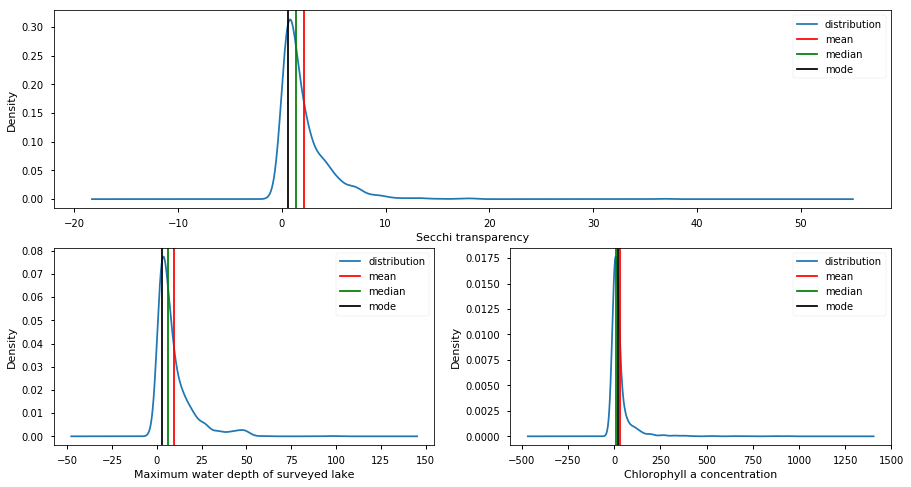

In [97]:
# Plot distribution  
%matplotlib inline
plt.style.use('seaborn-notebook')
fig = plt.figure(figsize = (20, 20))
plt.rcParams.update({'font.size': 22})

ax1 = plt.subplot(2, 1, 1)
ax1 = trophic_cond_filtered['SECMEAN'].plot.kde(label = 'distribution', figsize = (15,8))
ax1.axvline(trophic_cond_filtered['SECMEAN'].mean(), label = 'mean', color = 'red')
ax1.axvline(trophic_cond_filtered['SECMEAN'].median(), label = 'median', color = 'green')
ax1.axvline(trophic_cond_filtered['SECMEAN'].mode()[0], label = 'mode', color = 'black')
plt.xlabel('Secchi transparency')
ax1.legend()

ax2 = plt.subplot(2, 2, 3)

ax2 = site_2007_filtered['DEPTHMAX'].plot.kde(label = 'distribution', figsize = (15,8))
ax2.axvline(site_2007_filtered['DEPTHMAX'].mean(), label = 'mean', color = 'red')
ax2.axvline(site_2007_filtered['DEPTHMAX'].median(), label = 'median', color = 'green')
ax2.axvline(site_2007_filtered['DEPTHMAX'].mode()[0], label = 'mode', color = 'black')
plt.xlabel('Maximum water depth of surveyed lake')
ax2.legend()

ax3 = plt.subplot(2, 2, 4)

ax2 = trophic_cond_filtered['CHLA'].plot.kde(label = 'distribution', figsize = (15,8))
ax2.axvline(trophic_cond_filtered['CHLA'].mean(), label = 'mean', color = 'red')
ax2.axvline(trophic_cond_filtered['CHLA'].median(), label = 'median', color = 'green')
ax2.axvline(trophic_cond_filtered['CHLA'].mode()[0], label = 'mode', color = 'black')
plt.xlabel('Chlorophyll a concentration')
ax2.legend()

From distribution plots, the best-replacing value for SECMEAN, DEPTHMAX, and CHLA features are mode, mode, and median, respectively.

In [98]:
# Replace missing values of secmean SECMEAN with mode value
from scipy import stats

trophic_cond_filtered = trophic_cond_filtered.copy()
trophic_cond_filtered.loc[:, 'SECMEAN'] = trophic_cond_filtered.loc[:, 'SECMEAN'].fillna(stats.mode)
sum(trophic_cond_filtered['SECMEAN'].isnull())

0

In [99]:
# Replace missing values of secmean DEPTHMAX with mode value

site_2007_filtered = site_2007_filtered.copy()
site_2007_filtered.loc[:, 'DEPTHMAX'] = site_2007_filtered.loc[:, 'DEPTHMAX'].fillna(stats.mode)
sum(site_2007_filtered['DEPTHMAX'].isnull())

0

In [100]:
# Replace missing values of secmean CHLA with mode value
trophic_cond_filtered.loc[:, 'CHLA'] = trophic_cond_filtered.loc[:, 'CHLA'].fillna(np.median)
sum(trophic_cond_filtered['CHLA'].isnull())

0

### Check duplicates

In [101]:
# Check duplicates for site file
site_2007_filtered.duplicated().sum()

1

In [102]:
# Remove duplicates for site file
site_2007_filtered = site_2007_filtered.drop_duplicates()
site_2007_filtered.duplicated().sum()

0

In [103]:
# Check duplicates for chemical condition file
water_chem2007_filtered.duplicated().sum()

0

In [104]:
# Check duplicates for trophic condition file
trophic_cond_filtered.duplicated().sum()

0

In [105]:
# Remove duplicates for water istotop variable file
isotop_var_filtered.duplicated().sum()

0

### Combing 2007 Data Sets
All 2007 data sets have common site id that can be used to combine all files into a one dataframe. However, site id column contains duplicates as few sites surveyed multiple times (noticed in visit number column). Therefore, merging on site id will result in duplicates. Merging on the date of the survey could be a better option. However, not all sample collected date is not the same, as investigated previously. To prevent duplicates while merging, the following strategies applied.

+ Create new helper column for site id values 
+ Merge by helper column and site id
+ Remove helper column from the merged file

In [106]:
# Create a helper column for site id (name 'id')
cols = [site_2007_filtered, water_chem2007_filtered, trophic_cond_filtered, isotop_var_filtered]

for c in cols:
    c['id'] = c.groupby('SITE_ID').cumcount()

# Merge on helper (id) and site_id columns
combined_data2007 = site_2007_filtered.merge(water_chem2007_filtered, on=['id', 'SITE_ID'], how='outer').merge(trophic_cond_filtered, on=['id', 'SITE_ID'], how='outer').merge(isotop_var_filtered, on=['id', 'SITE_ID'], how='outer')

# .merge(water_chemprof_filtered, on=['id', 'SITE_ID'], how='outer')


combined_data2007.head()

,SITE_ID,DATE_COL_x,LAT_DD,LON_DD,EPA_REG,URBAN,LAKE_ORIGIN,AREA_HA,LAKEAREA,LAKEPERIM,SLD,DEPTHMAX,ELEV_PT,id,SAMPLE_DEPTH,PH_LAB,NTL,PTL,TURB,CL,COND,NA,DOC,K,MG,TOC,CA,SO4,SIO2,CHLA,SECMEAN,DATE_COL_y,d18O_H2O,dD_H2O,E_I,RT
0,NLA06608-0001,2007-07-31,48.979029,-114.021840,Region_8,NO,NATURAL,66.293056,0.662931,3.178510,1.101247,8.3,1605.73,0,2.00,7.63,151,6,0.474,1.500000,96.28,10.961398,0.63,3.350535,242.255872,0.37,695.1070,46.34532,1.182,0.24,6.4,2007-07-31,-15.73,-120.24,0.103,0.77
1,NLA06608-0002,2007-06-14,33.036064,-79.983791,Region_4,YES,MAN-MADE,14.437998,0.144380,1.743510,1.294393,2.3,4.90,0,1.10,6.05,695,36,3.550,178.008066,44.80,109.874963,14.02,3.887643,63.773200,15.90,170.3586,17.03076,1.695,3.84,0.55,2007-06-14,1.24,2.32,0.366,0.26
2,NLA06608-0002,2007-07-23,33.036064,-79.983791,Region_4,YES,MAN-MADE,14.437998,0.144380,1.743510,1.294393,1.3,4.90,1,0.80,5.92,507,25,4.430,183.141558,42.87,92.736905,13.80,2.557660,62.538880,16.34,163.8217,13.49136,1.988,20.88,0.45,2007-07-23,2.47,5.70,0.467,0.33
3,NLA06608-0003,2007-08-29,28.047742,-97.859866,Region_6,YES,NATURAL,5.701737,0.057017,1.265008,1.494462,2.5,17.60,0,1.40,8.47,738,43,7.670,4889.143422,1089.00,7172.755889,6.00,147.781595,782.805744,6.75,2572.3450,1029.65310,45.248,16.96,0.71,2007-08-29,-0.01,-4.84,0.204,0.17
4,NLA06608-0003,2007-09-06,28.047742,-97.859866,Region_6,YES,NATURAL,5.701737,0.057017,1.265008,1.494462,2.4,17.60,1,0.94,8.54,843,50,9.530,5113.606770,1120.00,7142.307562,5.87,140.773606,781.406848,7.46,2485.0200,994.42566,7.900,12.86,0.49,2007-09-06,-0.66,-4.70,0.181,0.15


In [107]:

combined_data2007.shape

(1326, 36)

In [108]:
# Remove id column and save file
combined_data2007 = combined_data2007.drop(['id'], axis = 1)
combined_data2007.shape

(1326, 35)

In [109]:
#Check duplicate rows
combined_data2007.duplicated().sum()

0

In [110]:
# check duplicate columns
combined_data2007.columns

Index(['SITE_ID', 'DATE_COL_x', 'LAT_DD', 'LON_DD', 'EPA_REG', 'URBAN',
       'LAKE_ORIGIN', 'AREA_HA', 'LAKEAREA', 'LAKEPERIM', 'SLD', 'DEPTHMAX',
       'ELEV_PT', 'SAMPLE_DEPTH', 'PH_LAB', 'NTL', 'PTL', 'TURB', 'CL', 'COND',
       'NA', 'DOC', 'K', 'MG', 'TOC', 'CA', 'SO4', 'SIO2', 'CHLA', 'SECMEAN',
       'DATE_COL_y', 'd18O_H2O', 'dD_H2O', 'E_I', 'RT'],
      dtype='object')

In [111]:
# remove duplicate columns
comb_data2007 = combined_data2007.drop(['DATE_COL_y'], axis = 1)

In [115]:
#Check missing values
comb_data2007.isnull().sum()

SITE_ID          0
DATE_COL_x      75
LAT_DD          75
LON_DD          75
EPA_REG         75
URBAN           75
LAKE_ORIGIN     75
AREA_HA         75
LAKEAREA        75
LAKEPERIM       75
SLD             75
DEPTHMAX        75
ELEV_PT         75
SAMPLE_DEPTH    10
PH_LAB           0
NTL              0
PTL              0
TURB             0
CL               0
COND             0
NA               0
DOC              0
K                0
MG               0
TOC              0
CA               0
SO4              0
SIO2             0
CHLA            74
SECMEAN         74
d18O_H2O        74
dD_H2O          74
E_I             74
RT              74
dtype: int64

In [116]:
# Display rows with missing values
comb_data2007[comb_data2007.isnull().any(axis=1)]

,SITE_ID,DATE_COL_x,LAT_DD,LON_DD,EPA_REG,URBAN,LAKE_ORIGIN,AREA_HA,LAKEAREA,LAKEPERIM,SLD,DEPTHMAX,ELEV_PT,SAMPLE_DEPTH,PH_LAB,NTL,PTL,TURB,CL,COND,NA,DOC,K,MG,TOC,CA,SO4,SIO2,CHLA,SECMEAN,d18O_H2O,dD_H2O,E_I,RT
157,NLA06608-0162,2007-08-28,42.733567,-72.103211,Region_1,YES,NATURAL,53.369211,0.533692,3.016800,1.164920,2,270.74,NaN,6.15,244,14,1.120,267.167232,51.80,271.468584,5.03,10.000451,29.952832,5.22,77.9937,73.74444,0.903,2.56,2.15,-5.13,-41.51,0.193,0.26
249,NLA06608-0297,2007-07-24,33.840970,-81.672072,Region_4,NO,MAN-MADE,4.036675,0.040367,0.841992,1.182201,2.7,186.93,NaN,6.70,587,31,3.920,238.961232,49.16,88.865617,5.83,60.718848,141.288496,6.93,84.1314,28.41930,0.937,14.13,1.13,3.15,8.61,0.643,0.63
310,NLA06608-0421,2007-06-28,43.095043,-73.766743,Region_2,YES,MAN-MADE,25.865709,0.258657,4.036894,2.239135,5.8,86.43,NaN,7.78,537,9,1.080,1851.329016,451.60,1769.047799,2.60,20.640316,657.316544,2.55,1834.3240,330.08028,4.333,2.18,2.9,-8.86,-61.72,0.017,0.05
320,NLA06608-0444,2007-07-12,34.165789,-89.911616,Region_4,NO,MAN-MADE,4.398899,0.043989,1.119552,1.505800,<function m...,92.35,NaN,6.82,383,42,15.500,38.614014,26.13,53.197577,3.72,29.771162,37.934768,4.32,70.1095,85.34118,1.189,10.27,<function m...,1.01,-2.57,0.429,0.00
400,NLA06608-0593,2007-07-10,48.708678,-122.327709,Region_10,YES,MAN-MADE,10.314727,0.103147,1.329263,1.167554,26.5,104.79,NaN,7.70,203,4,0.722,116.603604,68.98,169.466689,3.37,11.637353,158.322112,3.71,295.7074,64.81266,2.418,10.69,4.91,-8.37,-63.58,0.087,1.37
438,NLA06608-0662,2007-08-07,45.080297,-71.351888,Region_1,NO,NATURAL,140.857347,1.408573,6.321545,1.502549,3.5,479.96,NaN,7.46,256,12,1.640,234.871362,68.40,220.837366,2.88,7.007988,97.593568,2.97,273.0029,52.21656,2.710,2.97,2.55,-8.71,-67.14,0.084,0.24
468,NLA06608-0726,2007-08-14,43.834951,-71.093351,Region_1,NO,NATURAL,12.018505,0.120185,1.615132,1.314249,5.5,124.81,NaN,7.31,202,6,0.681,176.033646,52.39,209.701978,2.76,14.322896,57.848464,2.68,189.9194,58.75404,5.892,1.5,3.95,-8.51,-61.29,0.018,0.07
473,NLA06608-0738,2007-08-16,43.177656,-72.066162,Region_1,YES,NATURAL,76.923704,0.769237,5.999985,1.929813,14,427.87,NaN,6.27,223,3,0.539,124.275636,30.48,104.437762,3.75,6.880105,21.312592,4.08,73.5027,69.74700,1.570,1.7,5.25,-7.62,-55.28,0.110,1.03
823,NLA06608-1481,2007-08-14,40.494385,-121.162923,Region_9,NO,NATURAL,39.183996,0.391840,3.412279,1.537748,20.8,1973.92,NaN,7.31,135,3,0.351,4.005252,20.34,20.661365,1.55,3.222652,65.172096,1.65,92.4148,2.50000,4.067,0.49,9.89,-9.48,-79.97,0.232,3.71
899,NLA06608-1717,2007-09-25,37.662358,-120.209637,Region_9,NO,MAN-MADE,2267.070418,22.670704,135.741759,8.042222,51,255.73,NaN,7.39,79,3,0.830,32.493312,43.10,72.597511,1.37,13.657904,112.240832,1.10,199.1010,42.16050,6.680,0.88,5.5,-10.80,-84.26,0.133,1.73


It looks more than half of the features has rows with 75 missing values. Missing values should be removed to avoid data noise.

In [117]:
comb_data2007 = comb_data2007.dropna()
comb_data2007.isnull().sum()

SITE_ID         0
DATE_COL_x      0
LAT_DD          0
LON_DD          0
EPA_REG         0
URBAN           0
LAKE_ORIGIN     0
AREA_HA         0
LAKEAREA        0
LAKEPERIM       0
SLD             0
DEPTHMAX        0
ELEV_PT         0
SAMPLE_DEPTH    0
PH_LAB          0
NTL             0
PTL             0
TURB            0
CL              0
COND            0
NA              0
DOC             0
K               0
MG              0
TOC             0
CA              0
SO4             0
SIO2            0
CHLA            0
SECMEAN         0
d18O_H2O        0
dD_H2O          0
E_I             0
RT              0
dtype: int64

In [118]:
comb_data2007.shape

(1241, 34)

In [119]:
# Save combined file 
comb_data2007.to_csv('combined_2007.csv')

# See Clean and Tranform Data Part II